In [ ]:
!pip install opencv-python-headless matplotlib numpy

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#charger une image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/example2.jpg')


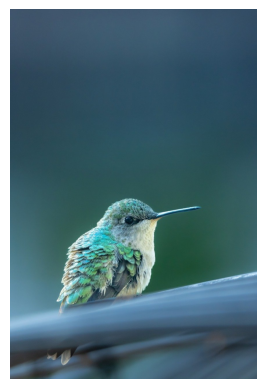

In [ ]:

# Assuming 'image' is already loaded using cv2.imread()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

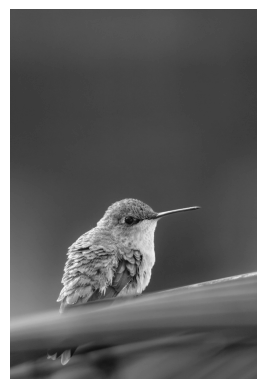

In [ ]:

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

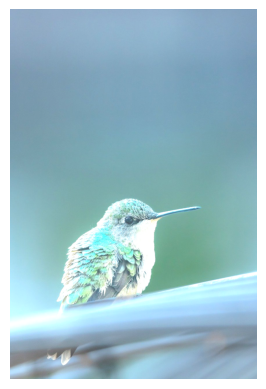

In [ ]:
def adjust_brightness_contrast(image, brightness=0 , contrast=0):
  return cv2.convertScaleAbs(image, alpha=1 + contrast / 100 , beta= brightness)

image_adjusted =  adjust_brightness_contrast(image, brightness=70 , contrast=20)
plt.imshow(cv2.cvtColor(image_adjusted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()




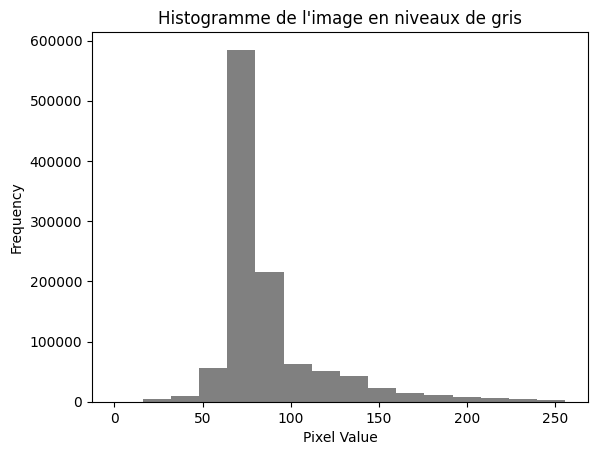

In [ ]:
plt.hist(gray_image.ravel(), bins=16, range=(0, 256), color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogramme de l\'image en niveaux de gris')
plt.show()

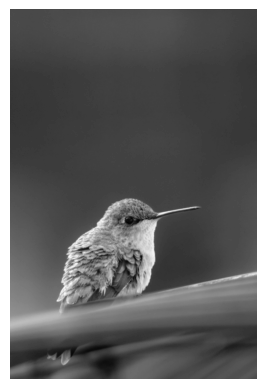

In [ ]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()

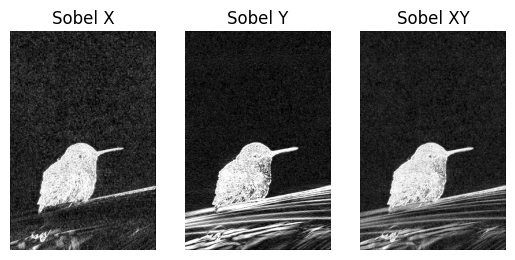

In [ ]:
#filtre de sobel X et Y pour detecter lles countours
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)
abs_sobel_x = cv2.convertScaleAbs(sobel_x)
abs_sobel_y = cv2.convertScaleAbs(sobel_y)
plt.subplot(1, 3, 1)
plt.imshow(abs_sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(abs_sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
#Norme du gradient
sobel_xy = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)
plt.subplot(1, 3, 3)
plt.imshow(sobel_xy, cmap='gray')
plt.title('Sobel XY')
plt.axis('off')
plt.show()


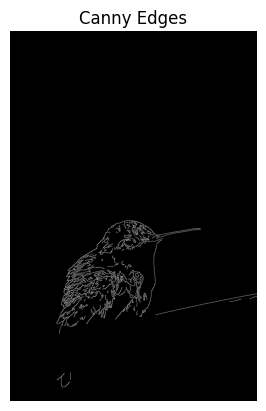

In [ ]:
#detection des coutours
edges = cv2.Canny(blurred_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()

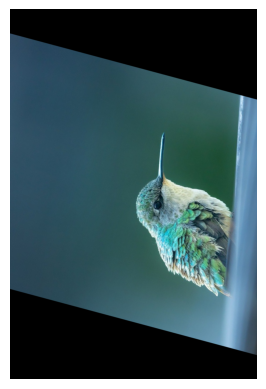

In [ ]:
#rotaion de l'image
rows, cols = gray_image.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 75, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

#affichage
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

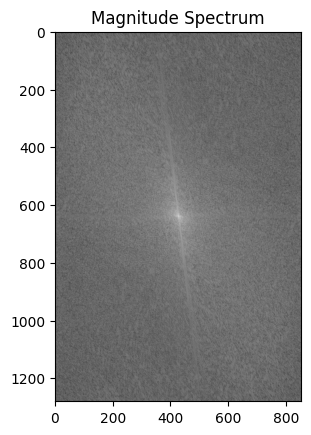

In [ ]:
dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

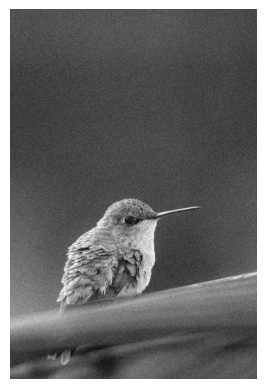

In [ ]:
# Assume gray_image is already loaded as a grayscale image

# Define Gaussian noise parameters
mean = 0
sigma = 20

# Generate Gaussian noise
noise = np.random.normal(mean, sigma, gray_image.shape).astype(np.float32)

# Add noise to the image
noisy_image = gray_image.astype(np.float32) + noise

# Clip values to stay within valid range [0, 255] and convert to uint8
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.show()


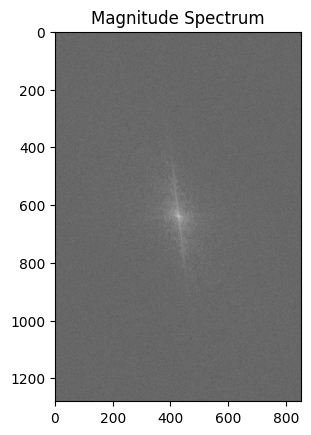

In [ ]:
# Apply Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(noisy_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)  # Adding 1 to avoid log(0)

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()


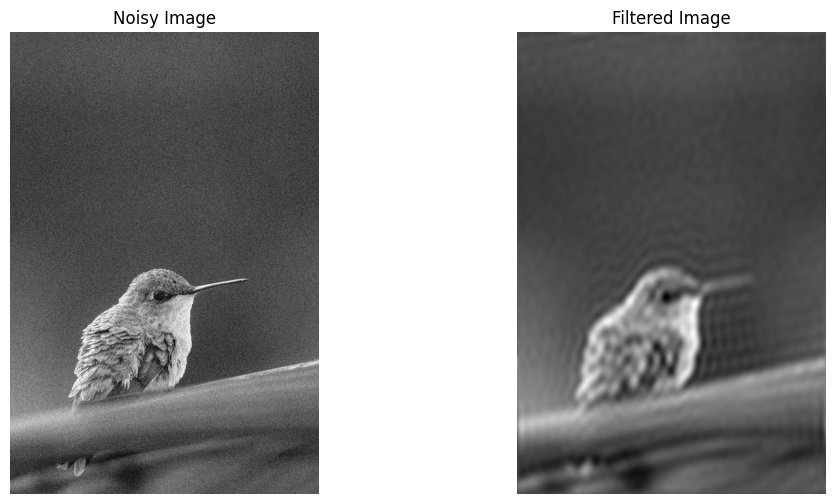

In [ ]:
#creer un masque  passe bas poiur filtrer les hautes fq
rows, cols = noisy_image.shape
crow, ccol = rows // 2, cols // 2 #centre de l'image
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# Apply the mask to the DFT shift
fshift = dft_shift * mask

#recontre et aplly TFI
dft_shift_back = np.fft.ifftshift(fshift)
img_back = cv2.idft(dft_shift_back)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

#affichage i'image filtre
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), plt.axis('off')
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()


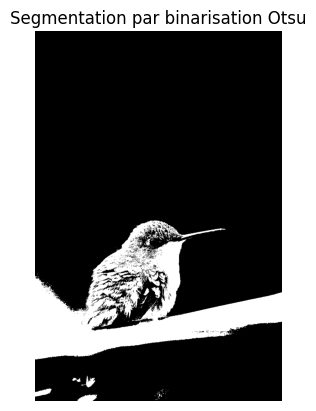

In [ ]:
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title('Segmentation par binarisation Otsu')
plt.show()
#

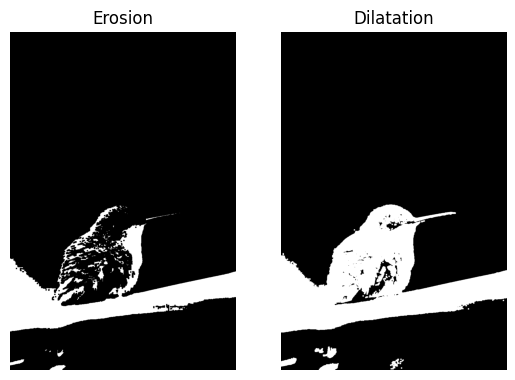

In [ ]:
#EROISION & dilatation
kernal  = np.ones((5, 5), np.uint8)
erosion = cv2.erode(binary_image, kernal, iterations=1)
dilation = cv2.dilate(binary_image, kernal, iterations=1)

plt.subplot(121), plt.imshow(erosion, cmap='gray')
plt.title('Erosion'), plt.axis('off')
plt.subplot(122), plt.imshow(dilation, cmap='gray')
plt.title('Dilatation'), plt.axis('off')
plt.show()


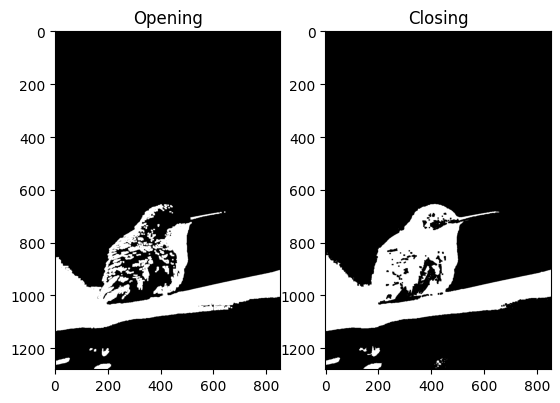

In [ ]:
def apply_opening(image, kernel_size, iterations=1):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=iterations)
    return opening

def apply_closing(image, kernel_size, iterations=1):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    return closing

# Assuming `binary_image` is your input binary image
opened_image = apply_opening(binary_image, kernel_size=5, iterations=1)
closed_image = apply_closing(binary_image, kernel_size=5, iterations=1)

# Display the results if needed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(opened_image, cmap='gray')
plt.title('Opening')

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Closing')

plt.show()




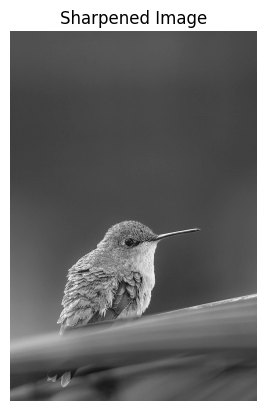

In [ ]:
#shaerping
def apply_sharpening(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image
#example usage
sharpened_image = apply_sharpening(gray_image)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

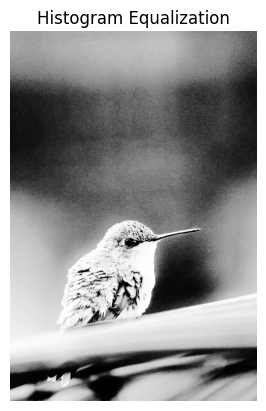

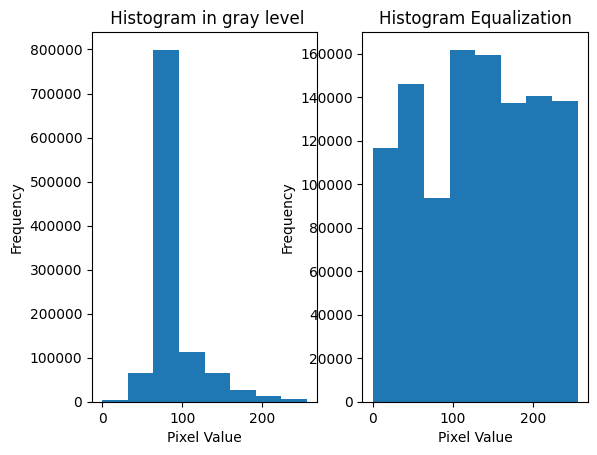

In [ ]:
equalized_image = cv2.equalizeHist(gray_image)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

plt.subplot(121)
plt.hist(gray_image.ravel(), bins=8, range=[0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title(' Histogram in gray level')
plt.subplot(122)
plt.hist(equalized_image.ravel(), bins=8, range=[0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram Equalization')
plt.show()
